# Bora usar algumas técnicas comuns de DSP: Mudanças de Domínios

<p>Uma das formas mais simples e seguras de se utilizar filtros em Python é utilizando a biblioteca SCIPY.</p>
<p>Por isso, demonstraremos aqui alguns tipos de filtros mais comuns sendo projetados e aplicados com essa bilbioteca.</p>

### 1. Imports

In [1]:
import librosa
import scipy
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### 2. Gerando um áudio simples para fazermos nossos testes

In [2]:
class CommonwaveformsGenerator:
    def __init__(self):
        pass
    
    def generate_square_wave(self, frequency, samples, sample_rate):
        sine_wave = self.generate_sine_wave(frequency, samples, sample_rate)
        square_wave = np.where(sine_wave > 0, 1, -1)
        return square_wave
    
    def generate_sine_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        sine_wave = np.sin(2 * np.pi * frequency * (time / sample_rate))
        return sine_wave
    
    def generate_triangle_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        return scipy.signal.sawtooth(2 * np.pi * frequency * (time / sample_rate), width=0.5)
    
    def generate_sawtooth_wave(self, frequency, n_samples, sample_rate):
        time = np.arange(n_samples)
        return scipy.signal.sawtooth(2 * np.pi * frequency * (time / sample_rate), width=1)
 

In [64]:
sample_rate = 44100
frequency = 440
duration = 1
n_samples = duration * sample_rate

generator = CommonwaveformsGenerator()

In [65]:
sine_wave = generator.generate_sine_wave(frequency, n_samples, sample_rate)
square_wave = generator.generate_square_wave(frequency, n_samples, sample_rate)
triangle_wave = generator.generate_triangle_wave(frequency, n_samples, sample_rate)
sawtooth_wave = generator.generate_sawtooth_wave(frequency, n_samples, sample_rate)

### 3. Mudanças de Domínio

### 3.1 FFT

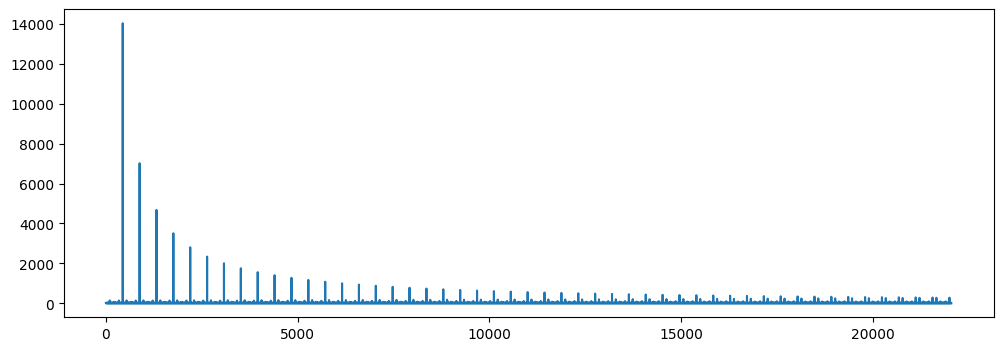

In [66]:
magnitude_spectrum = np.abs(np.fft.fft(sawtooth_wave))
magnitude_spectrum = magnitude_spectrum[0:len(magnitude_spectrum) // 2]

bin_frequencies = np.arange(len(magnitude_spectrum)) * sample_rate / 2 / len(magnitude_spectrum)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(bin_frequencies, magnitude_spectrum)

### 3.2 CQT

In [67]:
cqt_wave = np.abs(librosa.cqt(sawtooth_wave, sr=sample_rate, fmin=librosa.note_to_hz('C2'), n_bins=84, bins_per_octave=12)).T
cqt_freqs = librosa.cqt_frequencies(84, fmin=librosa.note_to_hz('C2'))

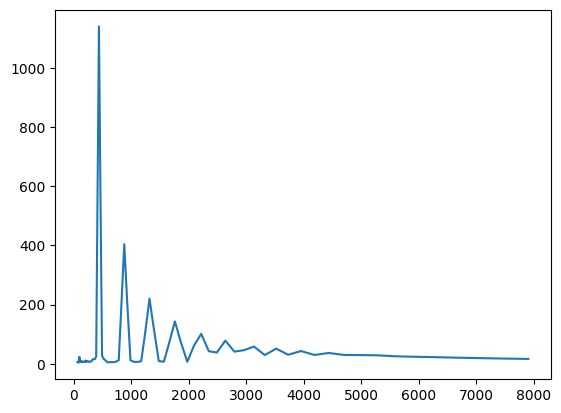

In [68]:
plt.plot(cqt_freqs, np.sum(cqt_wave, axis=0))

### 3.3 STFT

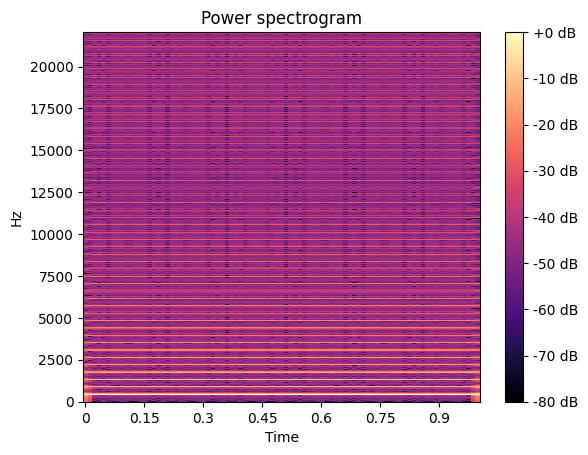

In [69]:
s = np.abs(librosa.stft(sawtooth_wave))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(s,
                                                       ref=np.max),
                               y_axis='linear', x_axis='time', sr=sample_rate, ax=ax)

ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

### 3.4. CQT Through Time

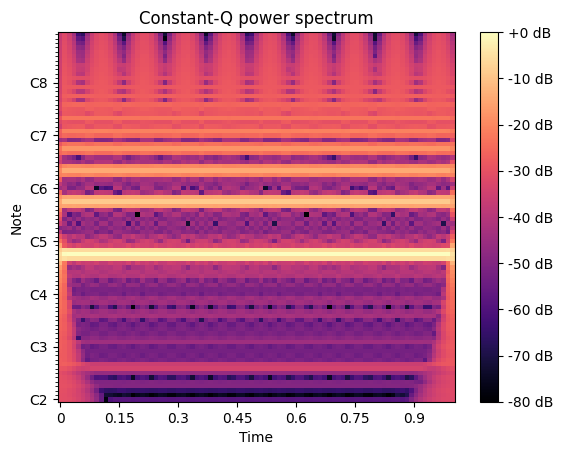

In [70]:
C = np.abs(librosa.cqt(sawtooth_wave, sr=sample_rate, fmin=librosa.note_to_hz('C2'), n_bins=84, bins_per_octave=12))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', fmin=librosa.note_to_hz('C2'), bins_per_octave=12, y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")